In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in datasets

# index values
fn_1 = join("..", "data", "processed", "CascadiaMargin_index_values.xlsx")
# carbon values
fn_2 = join("..", "data", "processed", "CascadiaMargin_carbon_abundance.xlsx")
# isomer ratio for glycerol degradation products
fn_3 = join("..", "data", "processed", "CascadiaMargin_glyc_degrad_prod.xlsx")

# dataframes
df_index_vals = pd.read_excel(fn_1)
df_carbon_abund = pd.read_excel(fn_2)
df_glyc = pd.read_excel(fn_3)

In [3]:
# df_glyc['Location'] = df_glyc['Location'].replace({"Mcarthur Cyn": "Mcarthur cyn"})

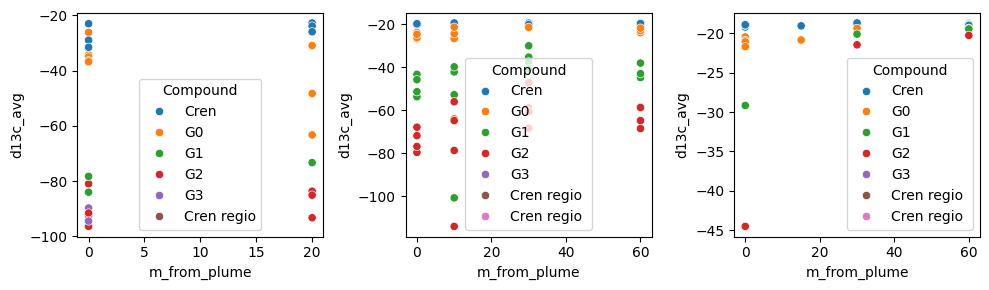

In [4]:
# recreation of figure 2
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax = ax.flatten()
locs = np.unique(df_carbon_abund["Location"])
for i, j in enumerate(locs):
    sns.scatterplot(
        data=df_carbon_abund[df_carbon_abund["Location"] == j],
        x="m_from_plume",
        y="d13c_avg",
        hue="Compound",
        ax=ax[i],
    )
plt.tight_layout()

In [5]:
# merge index + carbon/abundance to reproduce figure 3
merge_1 = pd.merge(df_index_vals, df_carbon_abund, on="Sample Name")

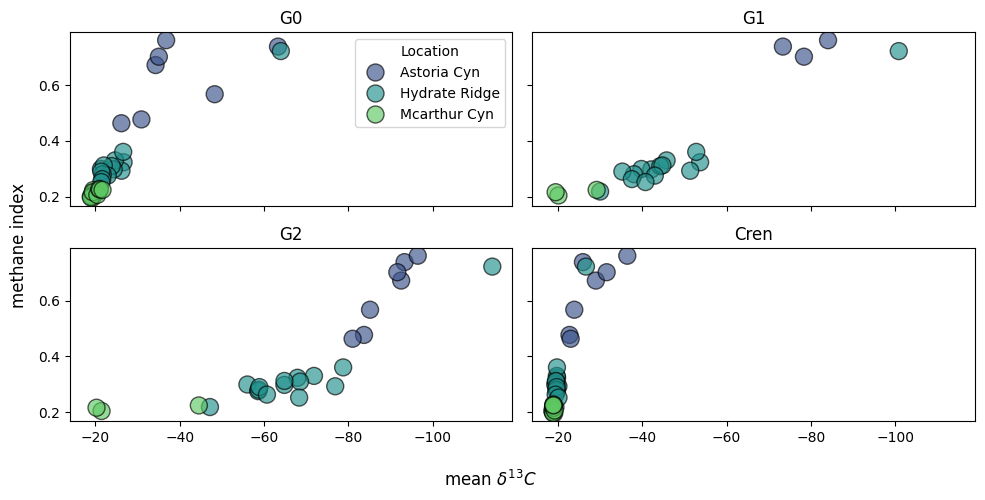

In [6]:
# Figure 3
gdgts = ["G0", "G1", "G2", "Cren"]
fig, axs = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
axs = axs.flatten()
for i, ax in enumerate(axs):
    sns.scatterplot(
        data=merge_1[merge_1["Compound"] == gdgts[i]],
        x="d13c_avg",
        y="MI index",
        hue="Location_x",
        palette="viridis",
        s=150,
        edgecolor="k",
        alpha=0.65,
        ax=ax,
    )
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(gdgts[i])
axs[0].invert_xaxis()
axs[0].get_legend().set_title("Location")
for ax in axs.flatten()[1:]:
    ax.get_legend().remove()
fig.supxlabel("mean $\delta^{13}C$")
fig.supylabel("methane index")
fig.tight_layout()

In [7]:
# merge all datasets to reproduce figure 4
all_merge = pd.merge(merge_1, df_glyc, on="Sample Name")

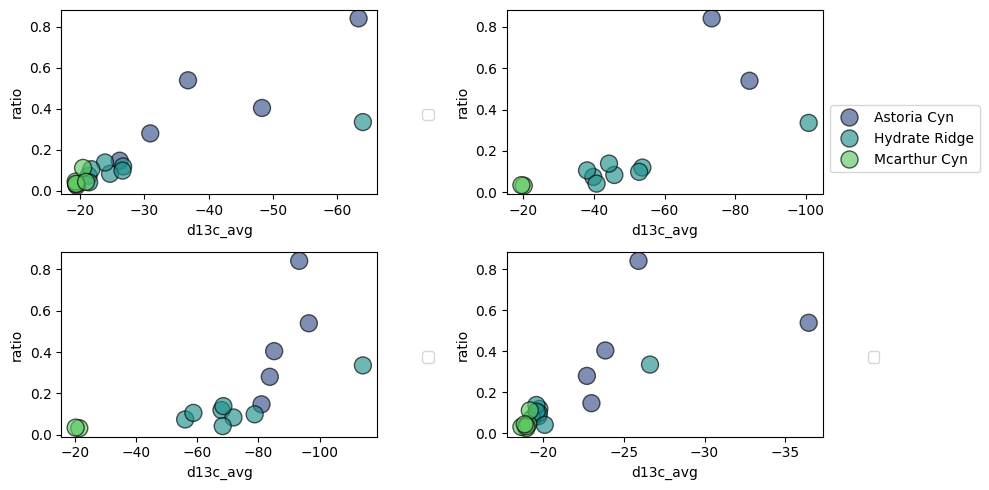

In [8]:
# Figure 4
gdgts = ["G0", "G1", "G2", "Cren"]
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax = ax.flatten()
for i, j in enumerate(gdgts):
    sns.scatterplot(
        data=all_merge[all_merge["Compound"] == j],
        x="d13c_avg",
        y="ratio",
        hue="Location",
        ax=ax[i],
        palette="viridis",
        s=150,
        edgecolor="k",
        alpha=0.65,
    )
    ax[i].invert_xaxis()
ax[3].legend("", bbox_to_anchor=(1.2, 0.5))
ax[0].legend("", bbox_to_anchor=(1.2, 0.5))
ax[2].legend("", bbox_to_anchor=(1.2, 0.5))
ax[1].legend(loc="center left", bbox_to_anchor=(1, 0.3))
plt.tight_layout()

In [9]:
# merge all three datasets
merge_3 = pd.merge(merge_1, df_glyc, on="Sample Name", how="outer")
merge_3.columns

Index(['Sample Name', 'Location_x', 'm_from_plume_x', 'TEX86-corr', 'Uk'37',
       'MI index', '50th_percentile', 'delta_sst', 'Location_y', 'Compound',
       'm_from_plume_y', 'depth_int', 'avg_ugC', 'F2/F1 ', 'd13c_avg', 'stdev',
       'purity_score', 'rel_abund', 'Location', 'm_from_plume', 'ratio'],
      dtype='object')

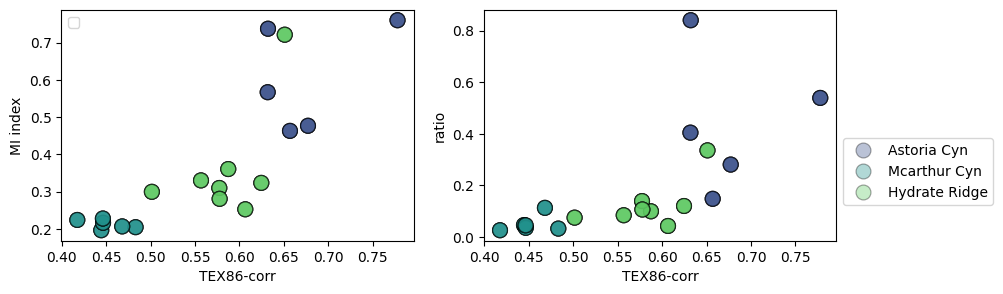

In [10]:
# Figure 5
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.flatten()
vals = ["MI index", "ratio"]
for i, j in enumerate(vals):
    sns.scatterplot(
        data=merge_3,
        x="TEX86-corr",
        hue="Location",
        y=j,
        ax=ax[i],
        palette="viridis",
        edgecolor="k",
        alpha=0.35,
        s=115,
    )
ax[1].legend(loc="center left", bbox_to_anchor=(1, 0.3))
ax[0].legend("")

In [11]:
# Chromatograms Astoria
s1 = "/Users/katherinekeller/Documents/PhD/Cascadia_Margin/Astoria_Cyn/QQQ_data/QQQ_chromfiles/Astoria_Cyn/chrom_s1_all.xlsx"
chrom = pd.read_excel(s1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/katherinekeller/Documents/PhD/Cascadia_Margin/Astoria_Cyn/QQQ_data/QQQ_chromfiles/Astoria_Cyn/chrom_s1_all.xlsx'